In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
test = pd.read_csv("/content/sentiment_aggregated_nifty.csv")
test.keys()

Index(['Week', 'open_price', 'close_price', 'past_closing', 'Positive',
       'Negative', 'Neutral', 'hist_f', 'sent_f', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [ ]:
for index, row in test.iterrows():
    if row["Positive"] > row["Neutral"] and row["Positive"] > row["Negative"]:
        test.at[index, "sentiment"] = 1
    elif row["Negative"] > row["Neutral"] and row["Negative"] > row["Positive"]:
        test.at[index, "sentiment"] = -1
    elif row["Negative"] < row["Neutral"] and row["Neutral"] > row["Positive"]:
        test.at[index, "sentiment"] = 0
    elif row["Negative"] == row["Neutral"] and row["Neutral"] == row["Positive"]:
        test.at[index, "sentiment"] = 0

In [ ]:
## Without Sentiment
ct = make_column_transformer(
    (MinMaxScaler(), ['open_price']),
    )

# Historical Prices

In [ ]:
tf.random.set_seed(42)

callback =  tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/checkpoint', monitor = "mae", save_best_only = True,)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),  # Adjust input shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mape", "mae"]
)

##2018

In [ ]:
#2018
test_2018 = test[:52]
W_2018 = test_2018["open_price"]
z_2018 = test_2018["close_price"]
W_2018_train , W_2018_test , z_2018_train , z_2018_test = train_test_split(W_2018, z_2018 , test_size = 0.2 , shuffle = False)

In [ ]:
model.fit(W_2018_train, z_2018_train, epochs=1000, callbacks=[callback],verbose=0)

In [ ]:
model.evaluate(W_2018_test, z_2018_test)

1/1 [==============================] - 0s 193ms/step - loss: 215.8131 - mape: 2.0491 - mae: 215.8131


[215.81312561035156, 2.0491364002227783, 215.81312561035156]

In [ ]:
y_pred_2018 = model.predict(W_2018_test)

1/1 [==============================] - 0s 75ms/step


[]

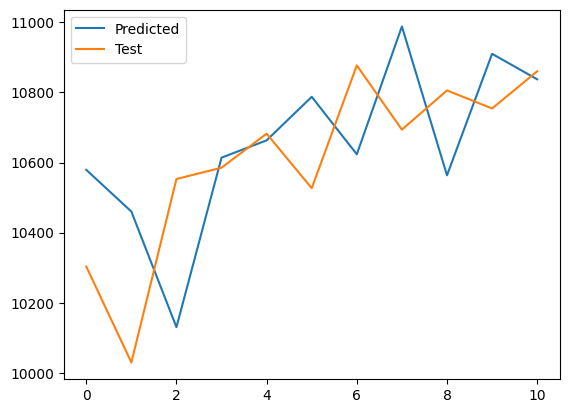

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred_2018)),y_pred_2018, label = "Predicted")
plt.plot(range(len(z_2018_test)),z_2018_test, label = "Test")
plt.legend()
plt.plot()

##2019

In [ ]:
#2019
test_2019 = test[:104]
W_2019 = test_2019["open_price"]
z_2019 = test_2019["close_price"]
W_2019_train , W_2019_test , z_2019_train , z_2019_test = train_test_split(W_2019 ,z_2019 , test_size = 0.2 , shuffle = False)

In [ ]:
model.fit(W_2019_train, z_2019_train, epochs=1000,callbacks=[callback], verbose=0)

In [ ]:
model.evaluate(W_2019_test, z_2019_test)

1/1 [==============================] - 0s 50ms/step - loss: 54.3141 - mae: 54.3141


[54.31407928466797, 54.31407928466797]

In [ ]:
y_pred_2019 = model.predict(W_2019_test)

1/1 [==============================] - 0s 33ms/step


[]

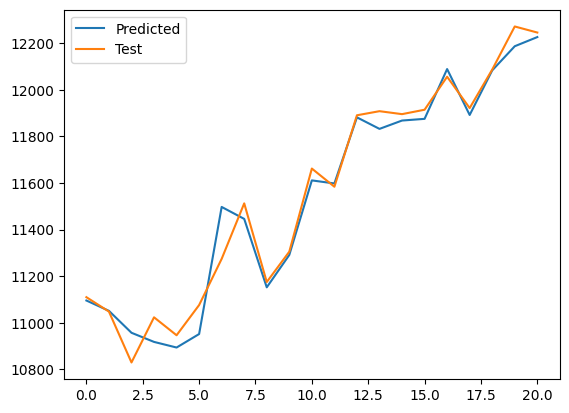

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred_2019)),y_pred_2019, label = "Predicted")
plt.plot(range(len(z_2019_test)),z_2019_test, label = "Test")
plt.legend()
plt.plot()

##2020

In [ ]:
#2020
test_2020 = test[:156]
W_2020 = test_2020["open_price"]
z_2020 = test_2020["close_price"]
W_2020_train , W_2020_test , z_2020_train , z_2020_test = train_test_split(W_2020 ,z_2020 , test_size = 0.2 , shuffle = False)

In [ ]:
model.fit(W_2020_train, z_2020_train, epochs=1000, callbacks=[callback],verbose=0)

In [ ]:
model.evaluate(W_2020_test, z_2020_test)

1/1 [==============================] - 0s 24ms/step - loss: 181.4984 - mae: 181.4984


[181.49844360351562, 181.49844360351562]

In [ ]:
y_pred_2020 = model.predict(W_2020_test)

1/1 [==============================] - 0s 17ms/step


[]

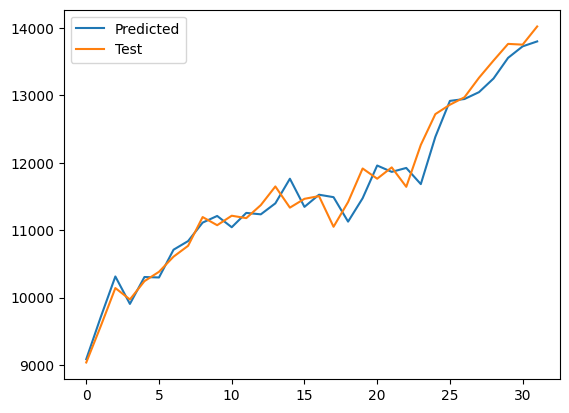

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred_2020)),y_pred_2020, label = "Predicted")
plt.plot(range(len(z_2020_test)),z_2020_test, label = "Test")
plt.legend()
plt.plot()

##2021

In [ ]:
#2021
test_2021 = test[:208]
W_2021 = test_2021["open_price"]
z_2021 = test_2021["close_price"]
W_2021_train , W_2021_test , z_2021_train , z_2021_test = train_test_split(W_2021 ,z_2021 , test_size = 0.2 , shuffle = False)

In [ ]:
model.fit(W_2021_train, z_2021_train, epochs=1000,callbacks=[callback], verbose=0)

In [ ]:
model.evaluate(W_2021_test, z_2021_test)

2/2 [==============================] - 0s 6ms/step - loss: 255.2456 - mae: 255.2456


[255.24563598632812, 255.24563598632812]

In [ ]:
y_pred_2021 = model.predict(W_2021_test)

2/2 [==============================] - 0s 4ms/step


[]

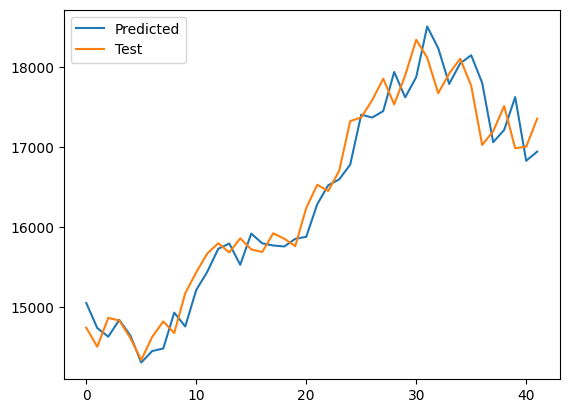

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred_2021)),y_pred_2021, label = "Predicted")
plt.plot(range(len(z_2021_test)),z_2021_test, label = "Test")
plt.legend()
plt.plot()

## 2022

In [ ]:
#2022
test_2022 = test[:260]
W_2022 = test_2022["open_price"]
z_2022 = test_2022["close_price"]
W_2022_train , W_2022_test , z_2022_train , z_2022_test = train_test_split(W_2022 ,z_2022 , test_size = 0.2 , shuffle = False)

In [ ]:
model.fit(W_2022_train, z_2022_train, epochs=1000,callbacks=[callback], verbose=0)

In [ ]:
model.evaluate(W_2022_test, z_2022_test)

2/2 [==============================] - 0s 7ms/step - loss: 301.8100 - mae: 301.8100


[301.80999755859375, 301.80999755859375]

In [ ]:
y_pred_2022 = model.predict(W_2022_test)

2/2 [==============================] - 0s 4ms/step


[]

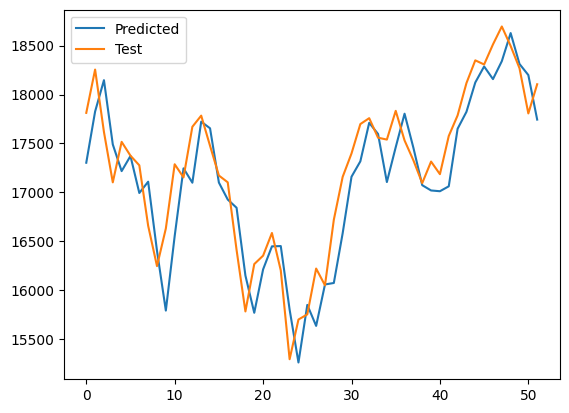

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(y_pred_2022)),y_pred_2022,label = "Predicted")
plt.plot(range(len(z_2022_test)),z_2022_test, label = "Test")
plt.legend()
plt.plot()

## 2023

In [ ]:
# 2023
W = test[["open_price"]]
z = test["close_price"]

In [ ]:
W_train , W_test , z_train , z_test = train_test_split(W, z , test_size = 0.2 , shuffle = False)

In [ ]:
model.fit(W_train, z_train, epochs=1000,callbacks=[callback], verbose=0)

In [ ]:
model.evaluate(W_test, z_test)

2/2 [==============================] - 0s 8ms/step - loss: 230.7166 - mape: 1.2277 - mae: 230.7166


[230.71658325195312, 1.2277185916900635, 230.71658325195312]

In [ ]:
y_pred_2023 = model.predict(W_test)
y_pred_2023_ = pd.DataFrame(y_pred_2023)

2/2 [==============================] - 0s 5ms/step


[]

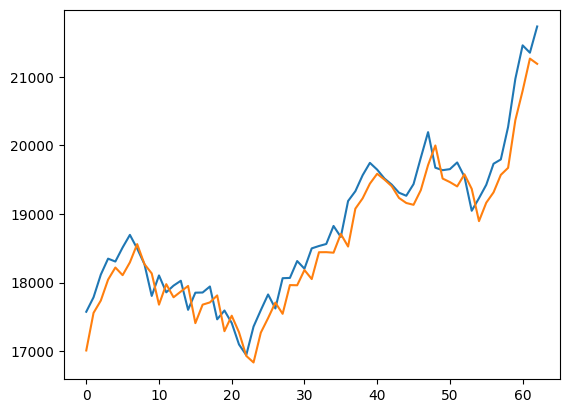

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(z_test)),z_test)
plt.plot(range(len(y_pred_2023_)),y_pred_2023_)
plt.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(z_test, y_pred_2023_)
print(mae)

272.70464409722223


In [ ]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(z_test,y_pred_2023_)

6.240007976435485

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Export the DataFrame to an Excel file
y_pred_2023_.to_excel('/content/drive/My Drive/weakmape.xlsx', index=False)

Mounted at /content/drive


#Sentiment

## 2018

In [ ]:
X_2018 = test_2018[:].drop(["close_price", "Week",'Positive', 'Negative', 'Neutral'], axis = 1)
y_2018 = test_2018["close_price"]

In [ ]:
# Creating the training and Testing Data set
X_2018_train , X_2018_test, y_2018_train, y_2018_test = train_test_split(X_2018 , y_2018 , test_size = 0.2, shuffle = False)

In [ ]:
ct.fit(X_2018_train)

# transform the training and test data with normalization and onehotencoder
X_train_normal_2018 = ct.transform(X_2018_train)
X_test_normal_2018 = ct.transform(X_2018_test)

In [ ]:
tf.random.set_seed(42)

callback =tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/checkpoint', monitor = "mape", save_best_only = True)

model_sent_2018 = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_normal_2018.shape[1],)),  # Adjust input shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_sent_2018.compile(
    loss="mape",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mape"]
)

NameError: name 'X_train_normal_2018' is not defined

In [ ]:
model_sent_2018.fit(X_train_normal_2018, y_2018_train, epochs=1000, callbacks = [callback],verbose=0)

In [ ]:
model_sent_2018.evaluate(X_test_normal_2018, y_2018_test)

1/1 [==============================] - 0s 108ms/step - loss: 213.9142 - mae: 213.9142


[213.91424560546875, 213.91424560546875]

## 2019

In [ ]:
X_2019 = test_2019[:].drop(["close_price", "Week",'Positive', 'Negative', 'Neutral'], axis = 1)
y_2019 = test_2019["close_price"]

In [ ]:
# Creating the training and Testing Data set
X_2019_train , X_2019_test, y_2019_train, y_2019_test = train_test_split(X_2019 , y_2019 , test_size = 0.2, shuffle = False)

In [ ]:
ct.fit(X_2019_train)

# transform the training and test data with normalization and onehotencoder
X_train_normal_2019 = ct.transform(X_2019_train)
X_test_normal_2019 = ct.transform(X_2019_test)

In [ ]:
tf.random.set_seed(42)

callback =tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/checkpoint', monitor = "mae", save_best_only = True)

model_sent_2019 = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_normal_2019.shape[1],)),  # Adjust input shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_sent_2019.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

In [ ]:
model_sent_2019.fit(X_train_normal_2019, y_2019_train, epochs=1000, callbacks = [callback],verbose=0)

In [ ]:
model_sent_2019.evaluate(X_test_normal_2019, y_2019_test)

1/1 [==============================] - 0s 34ms/step - loss: 52.1263 - mae: 52.1263


[52.12625503540039, 52.12625503540039]

## 2020

In [ ]:
X_2020 = test_2020[:].drop(["close_price", "Week",'Positive', 'Negative', 'Neutral'], axis = 1)
y_2020 = test_2020["close_price"]

In [ ]:
# Creating the training and Testing Data set
X_2020_train , X_2020_test, y_2020_train, y_2020_test = train_test_split(X_2020 , y_2020 , test_size = 0.2, shuffle = False)

In [ ]:
ct.fit(X_2020_train)

# transform the training and test data with normalization and onehotencoder
X_train_normal_2020 = ct.transform(X_2020_train)
X_test_normal_2020 = ct.transform(X_2020_test)

In [ ]:
tf.random.set_seed(42)

callback =tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/checkpoint', monitor = "mae", save_best_only = True)

model_sent_2020 = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_normal_2020.shape[1],)),  # Adjust input shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_sent_2020.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

In [ ]:
model_sent_2020.fit(X_train_normal_2020, y_2020_train, epochs=1000, callbacks = [callback],verbose=0)

In [ ]:
model_sent_2020.evaluate(X_test_normal_2020, y_2020_test)

1/1 [==============================] - 0s 128ms/step - loss: 194.4878 - mae: 194.4878


[194.48779296875, 194.48779296875]

## 2021

In [ ]:
X_2021 = test_2021[:].drop(["close_price", "Week",'Positive', 'Negative', 'Neutral'], axis = 1)
y_2021 = test_2021["close_price"]

In [ ]:
# Creating the training and Testing Data set
X_2021_train , X_2021_test, y_2021_train, y_2021_test = train_test_split(X_2021 , y_2021 , test_size = 0.2, shuffle = False)

In [ ]:
ct.fit(X_2021_train)

# transform the training and test data with normalization and onehotencoder
X_train_normal_2021 = ct.transform(X_2021_train)
X_test_normal_2021 = ct.transform(X_2021_test)

In [ ]:
tf.random.set_seed(42)

callback =tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/checkpoint', monitor = "mae", save_best_only = True)

model_sent_2021 = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_normal_2021.shape[1],)),  # Adjust input shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_sent_2021.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

In [ ]:
model_sent_2021.fit(X_train_normal_2021, y_2021_train, epochs=1000, callbacks = [callback],verbose=0)

In [ ]:
model_sent_2021.evaluate(X_test_normal_2021, y_2021_test)

2/2 [==============================] - 0s 7ms/step - loss: 257.7063 - mae: 257.7063


[257.706298828125, 257.706298828125]

## 2022

In [ ]:
#2022

In [ ]:
X_2022 = test_2022[:].drop(["close_price", "Week",'Positive', 'Negative', 'Neutral'], axis = 1)
y_2022 = test_2022["close_price"]

In [ ]:
# Creating the training and Testing Data set
X_2022_train , X_2022_test, y_2022_train, y_2022_test = train_test_split(X_2022 , y_2022 , test_size = 0.2, shuffle = False)

In [ ]:
ct.fit(X_2022_train)

# transform the training and test data with normalization and onehotencoder
X_train_normal_2022 = ct.transform(X_2022_train)
X_test_normal_2022 = ct.transform(X_2022_test)

In [ ]:
tf.random.set_seed(42)

callback =tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/checkpoint', monitor = "mae", save_best_only = True)

model_sent_2022 = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train_normal_2022.shape[1],)),  # Adjust input shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_sent_2022.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

In [ ]:
model_sent_2022.fit(X_train_normal_2022, y_2022_train, epochs=1000, callbacks = [callback],verbose=0)

In [ ]:
model_sent_2022.evaluate(X_test_normal_2022, y_2022_test)

2/2 [==============================] - 0s 8ms/step - loss: 286.7882 - mae: 286.7882


[286.7881774902344, 286.7881774902344]

## 2023

In [ ]:
X = test[:].drop(["close_price", "Week",'Positive', 'Negative', 'Neutral','hist_f', 'sent_f'], axis = 1)
y = test["close_price"]


In [ ]:
# Creating the training and Testing Data set
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, shuffle = False)

In [ ]:
X_train.shape


(249, 6)

In [ ]:
ct.fit(X_train)

# transform the training and test data with normalization and onehotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
tf.random.set_seed(42)

callback =tf.keras.callbacks.ModelCheckpoint(filepath = '/tmp/checkpoint', monitor = "mape", save_best_only = True)

model_sent = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),  # Adjust input shape
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_sent.compile(
    loss="mape",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mape","mae"]
)

In [ ]:
model_sent.fit(X_train, y_train, epochs=1000, callbacks = [callback],verbose=0)

In [ ]:
model_sent.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: nan - mape: nan - mae: nan


[nan, nan, nan]

In [ ]:
y_pred = model_sent.predict(X_test)
y_pred_sent = pd.DataFrame(y_pred)

2/2 [==============================] - 0s 4ms/step


In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

6.256820123262977

In [ ]:
import matplotlib.pyplot as plt

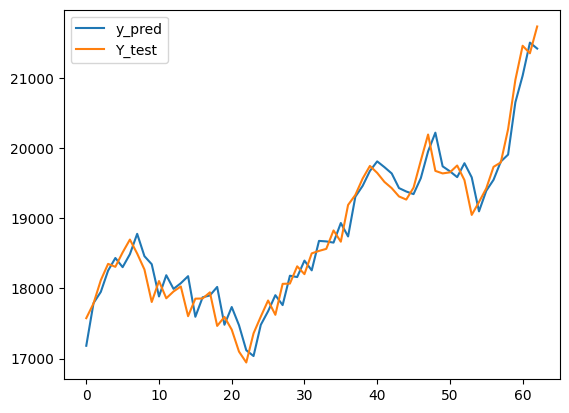

In [ ]:
plt.plot(range(len(y_pred)), y_pred, label='y_pred')
plt.plot(range(len(y_test)), y_test, label='Y_test')
plt.legend()
plt.show()

In [ ]:
result = {
    "Year": [2018,2019,2020,2021,2022,2023],
    "Historical":[219.0359 , 54.3141,181.4984,255.2456,301.8100,211.4466],
    "sentiment":[213.9142,52.1263,194.4878,257.7063,286.7882,212.2947]
}
results = pd.DataFrame(result)
results

,Year,Historical,sentiment
0,2018,219.0359,213.9142
1,2019,54.3141,52.1263
2,2020,181.4984,194.4878
3,2021,255.2456,257.7063
4,2022,301.8100,286.7882
5,2023,211.4466,212.2947
